In [121]:
import xarray as xr
import rioxarray as rio
# import dask
# import datacube

import matplotlib.pyplot as plt
from dask.distributed import Client

%matplotlib inline

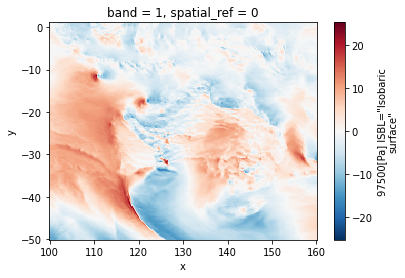

In [234]:
rr = rio.open_rasterio("/home/rvalavi/Downloads/gfs_vgrd_20220301_t00z_f010")
rr.plot()

In [235]:
rr

<xarray.DataArray (band: 1, y: 205, x: 241)>
array([[[ -0.123945,  -1.033945, ...,  -1.103945,  -0.693945],
        [  0.316055,   0.206055, ...,  -0.833945,  -0.413945],
        ...,
        [-12.993945, -12.783945, ...,   3.166055,   3.356055],
        [-13.023945, -12.773945, ...,   3.266055,   3.466055]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 159.2 159.5 159.8 160.0
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -49.25 -49.5 -49.75 -50.0
    spatial_ref  int64 0
Attributes:
    GRIB_COMMENT:                        v-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        VGRD
    GRIB_FORECAST_SECONDS:               36000 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 3 2 0 96 0 0 1 10 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 3 2 0 96 0 0 0 1 0 0 0 10 100 0 0 ...
    GRIB_REF_TIME:                       1646092800 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1646128800 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

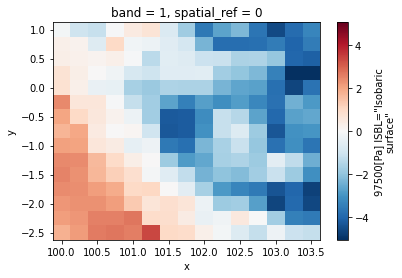

In [237]:
# cells = [i + 1 for i in range(15)]
r = rr.isel(x = range(15), y = range(15))
r.plot()

In [238]:
r

<xarray.DataArray (band: 1, y: 15, x: 15)>
array([[[-0.123945, -1.033945, ..., -3.883945, -3.353945],
        [ 0.316055,  0.206055, ..., -4.063945, -3.523945],
        ...,
        [ 2.126055,  2.246055, ..., -3.453945, -3.593945],
        [ 1.786055,  2.156055, ..., -1.103945, -1.193945]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 102.8 103.0 103.2 103.5
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -1.75 -2.0 -2.25 -2.5
    spatial_ref  int64 0
Attributes:
    GRIB_COMMENT:                        v-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        VGRD
    GRIB_FORECAST_SECONDS:               36000 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 3 2 0 96 0 0 1 10 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 3 2 0 96 0 0 0 1 0 0 0 10 100 0 0 ...
    GRIB_REF_TIME:                       1646092800 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1646128800 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

In [239]:
r.values.shape

(1, 15, 15)

In [240]:
r[0][10, 1] = 5
r[0].values[10, 1]

5.0

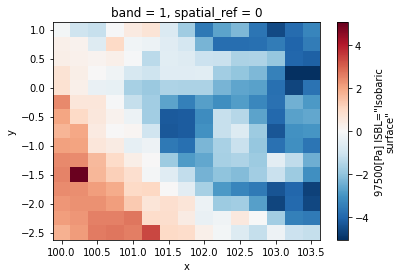

In [213]:
r[0].plot()

In [10]:
r.values[0, 2, [2, 3, 4]]

array([ 0.18605468,  0.30605468, -0.07394531])

In [17]:
# read multiple files
path = "/home/rvalavi/Downloads/GFSdata/"
li = os.listdir(path)
files = [os.path.join(path, i) for i in li]

files[0:3]

['/home/rvalavi/Downloads/GFSdata/gfs_vgrd_20220505_t00z_f003',
 '/home/rvalavi/Downloads/GFSdata/gfs_ugrd_20220505_t00z_f000',
 '/home/rvalavi/Downloads/GFSdata/gfs_ugrd_20220505_t00z_f007']

In [112]:
li = []
for i in files:
    li.append(rio.open_rasterio(i))

rr = xr.concat(li, dim = "band")

In [125]:
import rioxarray as rio
from datetime import datetime
import os

# read wind data and keep their information
def read_wind(path):
    files = os.listdir(path)
    rlist = []
    for i in files:
        name = os.path.join(path, i)
        _, comp, date, time, fcst = i.split("_")
        r = rio.open_rasterio(name, chunks=[1024,1024]).assign_coords(
            {'date': datetime(int(date[0:4]), int(date[4:6]), int(date[6:8])),
            'time':  str(time),
            'Component': str(comp),
            'Forecast': str(fcst)}
        )
        rlist.append(r)
    stack = xr.concat(rlist, dim = "band")
    return stack


In [126]:
rr = read_wind(path = "/home/rvalavi/Downloads/GFSdata/")
rr

<xarray.DataArray (band: 20, y: 205, x: 241)>
dask.array<concatenate, shape=(20, 205, 241), dtype=float64, chunksize=(1, 205, 241), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 159.2 159.5 159.8 160.0
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -49.25 -49.5 -49.75 -50.0
    spatial_ref  int64 0
    date         datetime64[ns] 2022-05-05
    time         <U4 't00z'
    Component    (band) <U4 'vgrd' 'ugrd' 'ugrd' 'ugrd' ... 'vgrd' 'vgrd' 'vgrd'
    Forecast     (band) <U4 'f003' 'f000' 'f007' 'f009' ... 'f004' 'f005' 'f008'
Attributes:
    GRIB_COMMENT:                        v-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        VGRD
    GRIB_FORECAST_SECONDS:               10800 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 3 2 0 96 0 0 1 3 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 3 2 0 96 0 0 0 1 0 0 0 3 100 0 0 1...
    GRIB_REF_TIME:                       1651708800 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1651719600 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

In [190]:
rr.Component

<xarray.DataArray 'Component' (band: 20)>
array(['vgrd', 'ugrd', 'ugrd', 'ugrd', 'ugrd', 'vgrd', 'ugrd', 'ugrd',
       'vgrd', 'vgrd', 'vgrd', 'vgrd', 'vgrd', 'ugrd', 'ugrd', 'ugrd',
       'ugrd', 'vgrd', 'vgrd', 'vgrd'], dtype='<U4')
Coordinates:
  * band         (band) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    spatial_ref  int64 0
    date         datetime64[ns] 2022-05-05
    time         <U4 't00z'
    Component    (band) <U4 'vgrd' 'ugrd' 'ugrd' 'ugrd' ... 'vgrd' 'vgrd' 'vgrd'
    Forecast     (band) <U4 'f003' 'f000' 'f007' 'f009' ... 'f004' 'f005' 'f008'

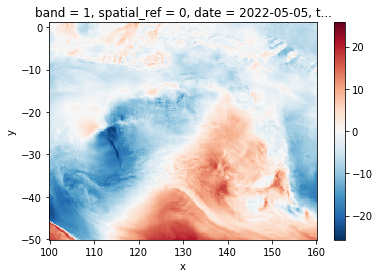

In [192]:
(rr[0] + rr[1]).plot()

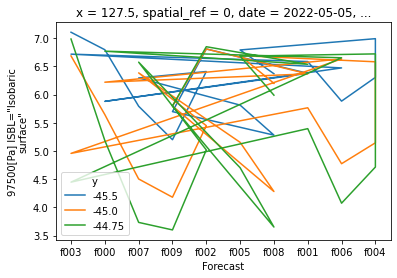

In [197]:
rr.isel(x=110, y=[-19, -21, -22]).plot.line(x="Forecast")

### Read GFS data for CA modelling

In [68]:
import xarray as xr
import rioxarray as rio
import numpy as np
import matplotlib.pyplot as plt
import os

In [127]:
rr = read_wind(path = "../Data")

In [128]:
r = rr[rr.Forecast == "f000"]
r

<xarray.DataArray (band: 2, y: 205, x: 241)>
dask.array<getitem, shape=(2, 205, 241), dtype=float64, chunksize=(1, 205, 241), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 159.2 159.5 159.8 160.0
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -49.25 -49.5 -49.75 -50.0
    spatial_ref  int64 0
    date         datetime64[ns] 2022-05-12
    time         <U4 't00z'
    Component    (band) <U4 'ugrd' 'vgrd'
    Forecast     (band) <U4 'f000' 'f000'
Attributes:
    GRIB_COMMENT:                        u-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        UGRD
    GRIB_FORECAST_SECONDS:               0 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 2 2 0 81 0 0 1 0 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 2 2 0 81 0 0 0 1 0 0 0 0 100 0 0 1...
    GRIB_REF_TIME:                       1652313600 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1652313600 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

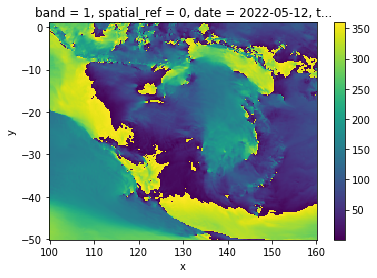

In [129]:
## calculate wind speed
rs = np.sqrt(np.power(r[r.Component == "ugrd"], 2) + np.power(r[r.Component == "vgrd"], 2))

## calculate the wind direction
## np.mod(180+np.rad2deg(np.arctan2(U, V)),360)
rd = np.mod(180 + np.rad2deg(np.arctan2(r[r.Component == "ugrd"], r[r.Component == "vgrd"])), 360)

rd.plot()

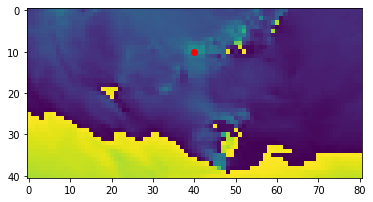

In [96]:
rss = rs.rio.clip_box(135, -45, 155, -35)
rdd = rd.rio.clip_box(135, -45, 155, -35)

# location around melbourne
plt.imshow(rdd[0])
plt.plot(40, 10, 'ro')
plt.show()

In [150]:
rdd.isel(band=0, x=40, y=10).values

array(167.19870516)

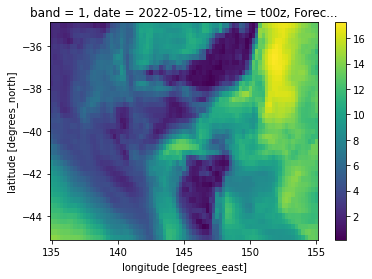

In [122]:
rss.plot()

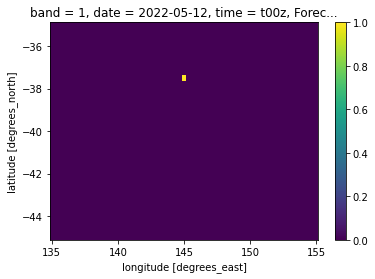

In [148]:
# new raster for the ca development
newr = rss.copy()
newr[0] = 0
# starting point
newr[0, 10, 40] = 1
# newr.isel(band=0, y=10, x=40).values

newr.plot()

In [152]:
def direction(x):
    # define the direction
    if x < 22.5 or x > 337.5:
        return "N"
    elif x > 22.5 and x < 67.5:
        return "NE"
    elif x > 67.5 and x < 112.5:
        return "E"
    elif x > 112.5 and x < 157.5:
        return "SE"
    elif x > 157.5 and x < 202.5:
        return "S"
    elif x > 202.5 and x < 247.5:
        return "SW"
    elif x > 247.5 and x < 292.5:
        return "W"
    elif x > 292.5 and x < 337.5:
        return "NW"

direction(rdd.isel(band=0, x=40, y=10))

'S'

In [124]:
xlen = rss.sizes['x']
ylen = rss.sizes['y']

for x in range(xlen):
    for y in range(ylen):
        nb = []
        for i in [-1, 0, 1]:
            for j in [-1, 0, 1]:

IndentationError: expected an indented block (597285215.py, line 8)